In [0]:
# This is multiclass classification example
# Because each data point can only beclassified into one category this is a 'single label multiclass classification'
# The labels associated with an example are integers from 0 to 45

In [0]:
import keras
from keras.datasets import reuters

In [40]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
# We're restricitng the dataset to the 10000 most frequently used words
print("train",len(train_data))

train 8982


In [41]:
print(len(test_data))

2246


In [42]:
# we can take a peek at what the data looks like
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

The articles have been word encoded as integers, pretty cool!

In [0]:
# Decoding word indices into ascii

word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# Note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [44]:
decoded_newswire #let's view the data

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

Preparing the data :)


In [0]:
import numpy as np

# This is a way to vectorize our data to make it suitable to deed into the network

def vectorize_sequences(sequences, dimension=10000):
  # results is gonna be our final vecor with zer0s everywhere except the in the sequence position
  # start by creating a zero vector
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [0]:
# This is the way to manually build a one hot encoding
# There are 46 labels
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# Our vectorized training labels
one_hot_train_labels = to_one_hot(train_labels)
# Our vectorized test labels
one_hot_test_labels = to_one_hot(test_labels)

In [0]:
from keras.utils.np_utils import to_categorical
# keras has an inbuild one-hot encoding function that you can use to vectorize your train and test data

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

Building the network




In [0]:

from keras import models
from keras import layers
# We've increased the dimensionality of the layers because we want to minimize the loss of meaningful information
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
# We use softmax classification because we're dealing with more than 2 classes and we want the output vector to be a probability vector
# This is especially useful when doing single label multiclass classification
model.add(layers.Dense(46, activation='softmax'))

In [0]:
# We will use the categorical-crossentropy as the loss function since we're dealing with multiple classes
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
# setting apart 1000 examples for the validation set

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

Train the model

In [51]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 79us/step - loss: 2.5584 - accuracy: 0.5314 - val_loss: 1.7108 - val_accuracy: 0.6420
Epoch 2/20
7982/7982 [==============================] - 1s 70us/step - loss: 1.3777 - accuracy: 0.7117 - val_loss: 1.2805 - val_accuracy: 0.7220
Epoch 3/20
7982/7982 [==============================] - 1s 68us/step - loss: 1.0239 - accuracy: 0.7766 - val_loss: 1.1185 - val_accuracy: 0.7520
Epoch 4/20
7982/7982 [==============================] - 1s 69us/step - loss: 0.8040 - accuracy: 0.8312 - val_loss: 1.0367 - val_accuracy: 0.7720
Epoch 5/20
7982/7982 [==============================] - 1s 69us/step - loss: 0.6387 - accuracy: 0.8658 - val_loss: 0.9626 - val_accuracy: 0.8100
Epoch 6/20
7982/7982 [==============================] - 1s 70us/step - loss: 0.5089 - accuracy: 0.8961 - val_loss: 0.9223 - val_accuracy: 0.8140
Epoch 7/20
7982/7982 [==============================] - 1s 70us/step - loss: 0.408

Plotting the loss function

In [52]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

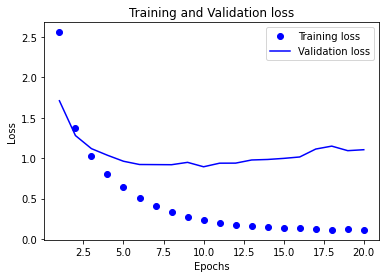

In [53]:
import matplotlib.pyplot as plt

# history is a variable that stores the results of the trained model
# .history is an dictionary attribute of the results of the trained model 
# the history dictionary contains the losses and accuracy levels per epoch

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(loss)+1)

# Time to plot the graph
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.title("Training and Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.legend()

plt.show()

Plotting the training and validation accuracy

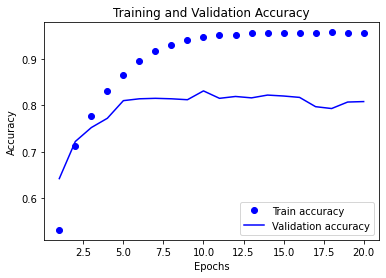

In [54]:
plt.clf()

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']


plt.plot(epochs, accuracy, 'bo', label ="Train accuracy")
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

In [0]:
# Retraining the model based on the feedback from the validation set
model = models.Sequential()
model.add(layers.Dense(64,activation='relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = "relu"))
model.add(layers.Dense(46, activation = "softmax"))

In [61]:
# Set the hyperparameters
model.compile(optimizer="rmsprop", loss ="categorical_crossentropy", metrics=["accuracy"])

# train the model using the model.fit function 

model.fit(
          partial_x_train,
          partial_y_train,
          epochs=8,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)




Train on 7982 samples, validate on 1000 samples
Epoch 1/8
7982/7982 [==============================] - 1s 81us/step - loss: 2.6250 - accuracy: 0.5195 - val_loss: 1.7555 - val_accuracy: 0.6310
Epoch 2/8
7982/7982 [==============================] - 1s 68us/step - loss: 1.4295 - accuracy: 0.6979 - val_loss: 1.3153 - val_accuracy: 0.7050
Epoch 3/8
7982/7982 [==============================] - 1s 69us/step - loss: 1.0636 - accuracy: 0.7665 - val_loss: 1.1694 - val_accuracy: 0.7380
Epoch 4/8
7982/7982 [==============================] - 1s 67us/step - loss: 0.8456 - accuracy: 0.8183 - val_loss: 1.0524 - val_accuracy: 0.7740
Epoch 5/8
7982/7982 [==============================] - 1s 69us/step - loss: 0.6810 - accuracy: 0.8587 - val_loss: 0.9685 - val_accuracy: 0.7960
Epoch 6/8
7982/7982 [==============================] - 1s 69us/step - loss: 0.5473 - accuracy: 0.8887 - val_loss: 0.9380 - val_accuracy: 0.8020
Epoch 7/8
7982/7982 [==============================] - 1s 68us/step - loss: 0.4442 - acc

In [63]:
results

[1.024889834948342, 0.7773820161819458]

Make a prediction on the data

In [65]:
predictions = model.predict(x_test)
# Each entry of the predictions is a vector of length 46
predictions[0].shape

(46,)

In [66]:
# The vector sums to 1 because it's a range of probabilities
np.sum(predictions[0])

1.0

In [67]:
# The largest entry is the predicted class, i.e. the class with the highest probability
np.argmax(predictions[0])

3

Here's another way to handle the labels and corresponding loss function

In [0]:
# Have the labels as an integer array instead of an encoded vector
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [0]:
# The loss function is "sparse_categorical_crossentropy"
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [70]:
# Intoducing a bottleneck by having an intermediate layer with much fewer activation units than the final layer
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 105us/step - loss: 3.2631 - accuracy: 0.2092 - val_loss: 2.7879 - val_accuracy: 0.4800
Epoch 2/20
7982/7982 [==============================] - 1s 92us/step - loss: 2.5081 - accuracy: 0.4769 - val_loss: 2.4144 - val_accuracy: 0.4540
Epoch 3/20
7982/7982 [==============================] - 1s 92us/step - loss: 2.2477 - accuracy: 0.4362 - val_loss: 2.2424 - val_accuracy: 0.4320
Epoch 4/20
7982/7982 [==============================] - 1s 93us/step - loss: 2.0532 - accuracy: 0.4214 - val_loss: 2.0749 - val_accuracy: 0.4240
Epoch 5/20
7982/7982 [==============================] - 1s 93us/step - loss: 1.8431 - accuracy: 0.4296 - val_loss: 1.8991 - val_accuracy: 0.4200
Epoch 6/20
7982/7982 [==============================] - 1s 94us/step - loss: 1.6258 - accuracy: 0.4503 - val_loss: 1.7026 - val_accuracy: 0.5190
Epoch 7/20
7982/7982 [==============================] - 1s 91us/step - loss: 1.38

The highest accuracy is about 68%

In [71]:
# Experimenting using an intermediate layer with much more units
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 105us/step - loss: 1.7288 - accuracy: 0.6274 - val_loss: 1.1929 - val_accuracy: 0.7210
Epoch 2/20
7982/7982 [==============================] - 1s 95us/step - loss: 0.9239 - accuracy: 0.7974 - val_loss: 0.9391 - val_accuracy: 0.7960
Epoch 3/20
7982/7982 [==============================] - 1s 95us/step - loss: 0.5980 - accuracy: 0.8677 - val_loss: 0.8786 - val_accuracy: 0.8130
Epoch 4/20
7982/7982 [==============================] - 1s 95us/step - loss: 0.3994 - accuracy: 0.9133 - val_loss: 0.8522 - val_accuracy: 0.8140
Epoch 5/20
7982/7982 [==============================] - 1s 96us/step - loss: 0.2894 - accuracy: 0.9375 - val_loss: 0.8630 - val_accuracy: 0.8220
Epoch 6/20
7982/7982 [==============================] - 1s 95us/step - loss: 0.2255 - accuracy: 0.9455 - val_loss: 0.9013 - val_accuracy: 0.8240
Epoch 7/20
7982/7982 [==============================] - 1s 93us/step - loss: 0.18

With a higher dimensional intermediate layer we seem to be hitting a high accuracies of 82% an lows of 79%
Much better than the original on the validation set

In [72]:
# Testing this new model on the test data
results = model.evaluate(x_test, one_hot_test_labels)

2246/2246 [==============================] - 0s 132us/step


In [73]:
results

[1.6265101912609723, 0.7756010890007019]

After using the improved model on the test set it appears that the accuracy of this model is capped at ~78%